In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
# from geopy.distance import geodesic
# from geopy.distance import lonlat, distance
# from catboost import CatBoostRegressor

In [3]:
anz_transaction_dataset = pd.read_excel("ANZ dataset.xlsx", sheet_name="tran")

In [4]:
anz_transaction_dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
anz_transaction_dataset.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
anz_transaction_dataset.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
anz_transaction_dataset['date']=pd.to_datetime(anz_transaction_dataset['date'],infer_datetime_format=True, errors='coerce')
anz_transaction_dataset['extraction']=pd.to_datetime(anz_transaction_dataset['extraction'],infer_datetime_format=True, errors='coerce')
anz_transaction_dataset['time']=anz_transaction_dataset['extraction'].dt.time
anz_transaction_dataset['weekday']=anz_transaction_dataset['date'].dt.weekday
anz_transaction_dataset['month']=anz_transaction_dataset['date'].dt.month
anz_transaction_dataset['week']=anz_transaction_dataset['date'].dt.week
anz_transaction_dataset['monthname']=anz_transaction_dataset['date'].dt.month_name()
anz_transaction_dataset['weekdayname']=anz_transaction_dataset['date'].dt.day_name()

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


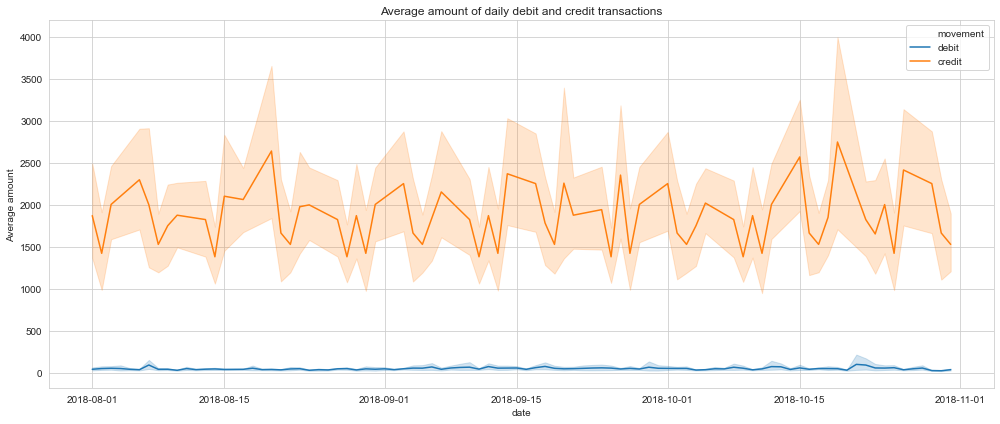

In [8]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
sns.lineplot(x='date',y='amount',hue='movement',data=anz_transaction_dataset)
plt.ylabel('Average amount')
plt.title('Average amount of daily debit and credit transactions')
plt.tight_layout()

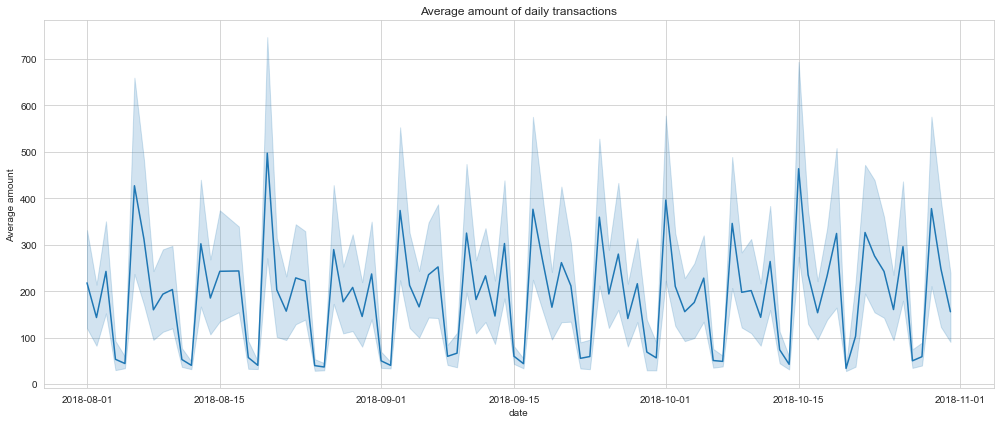

In [9]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
sns.lineplot(x='date',y='amount',data=anz_transaction_dataset)
plt.ylabel('Average amount')
plt.title('Average amount of daily transactions')
plt.tight_layout()

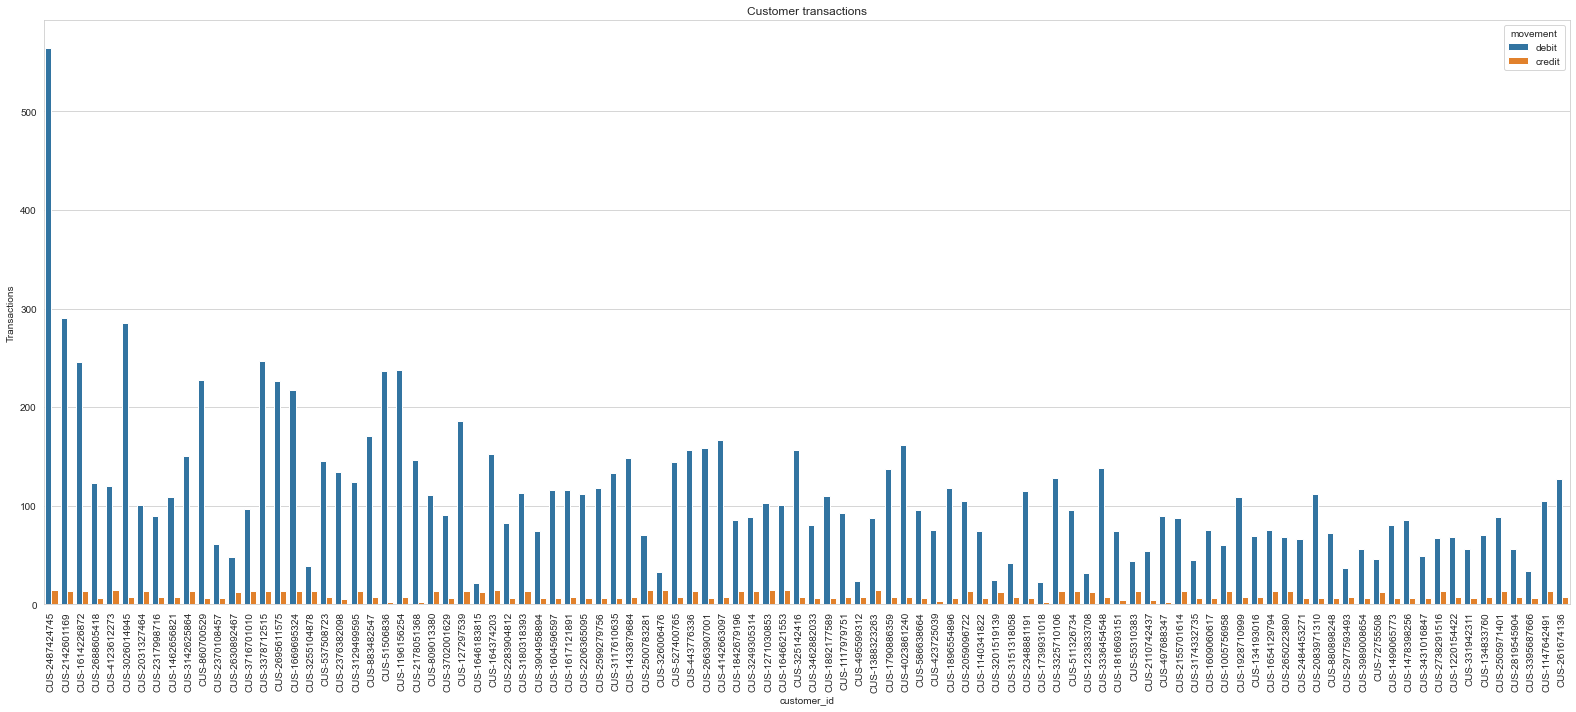

In [10]:
plt.figure(figsize=(22,10))
sns.set_style("whitegrid")
sns.countplot(x='customer_id',hue='movement',data=anz_transaction_dataset)
plt.ylabel('Transactions')
plt.title('Customer transactions')
plt.xticks(rotation=90)
plt.tight_layout()

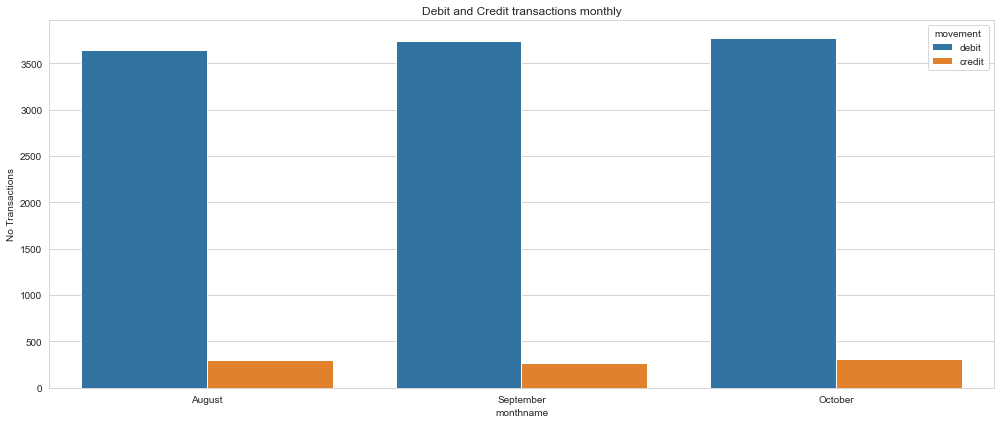

In [11]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
sns.countplot(x='monthname',hue='movement',data=anz_transaction_dataset)
plt.ylabel('No Transactions')
plt.title('Debit and Credit transactions monthly')
plt.tight_layout()

In [12]:
anz_dataset=pd.DataFrame(anz_transaction_dataset.groupby(by=['date','movement']).amount.sum()).reset_index()

In [13]:
anz_dataset.head()

,date,movement,amount
0,2018-08-01,credit,24321.50
1,2018-08-01,debit,5546.44
2,2018-08-02,credit,14228.23
3,2018-08-02,debit,7558.09
4,2018-08-03,credit,30060.68


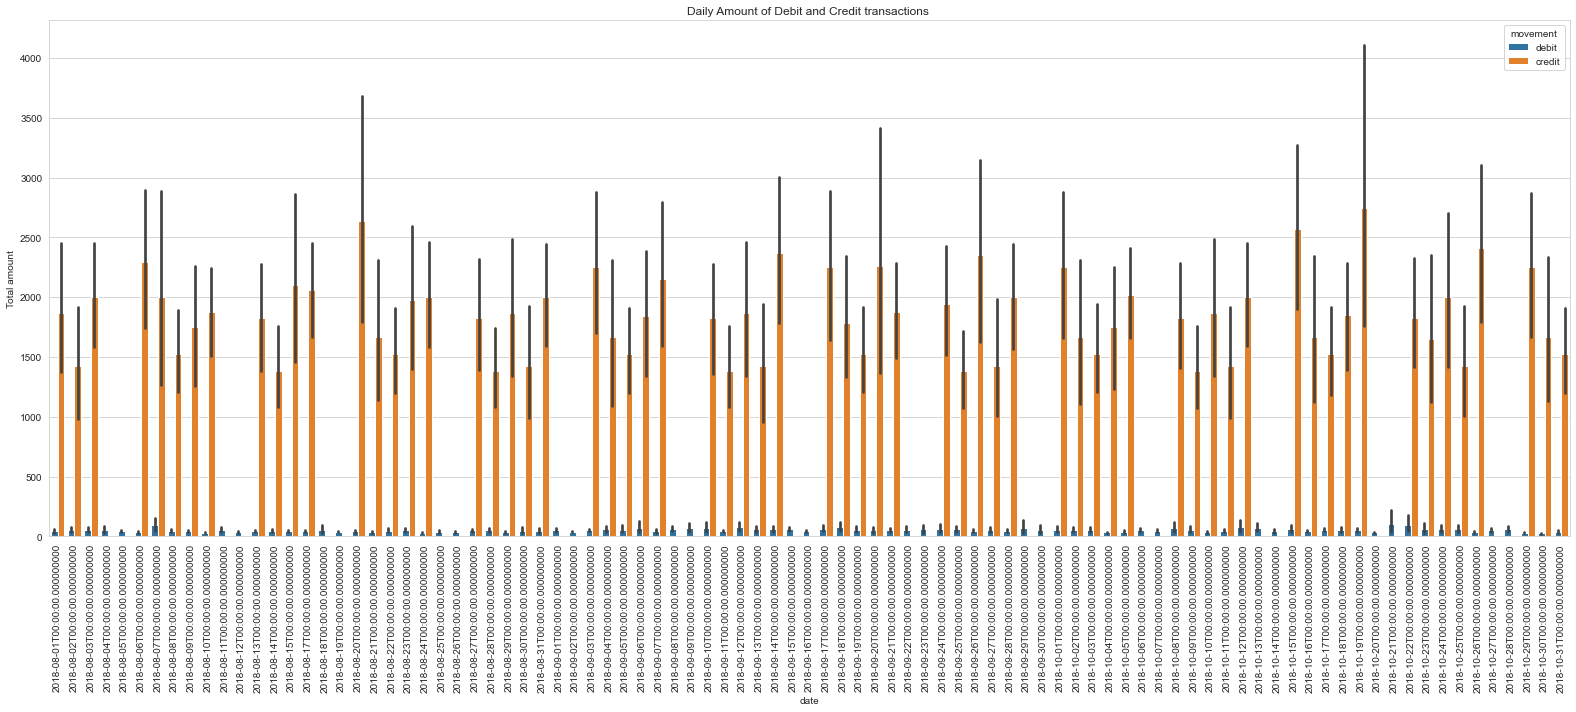

In [14]:
plt.figure(figsize=(22,10))
sns.set_style("whitegrid")
sns.barplot(x='date',y='amount',hue='movement',data=anz_transaction_dataset)
plt.ylabel('Total amount')
plt.title('Daily Amount of Debit and Credit transactions ')
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
anz_dataset1=pd.DataFrame(anz_transaction_dataset.groupby(by=['customer_id','monthname']).transaction_id.count
()).reset_index()

In [16]:
anz_dataset1.head()

,customer_id,monthname,transaction_id
0,CUS-1005756958,August,50
1,CUS-1005756958,October,9
2,CUS-1005756958,September,14
3,CUS-1117979751,August,43
4,CUS-1117979751,October,32


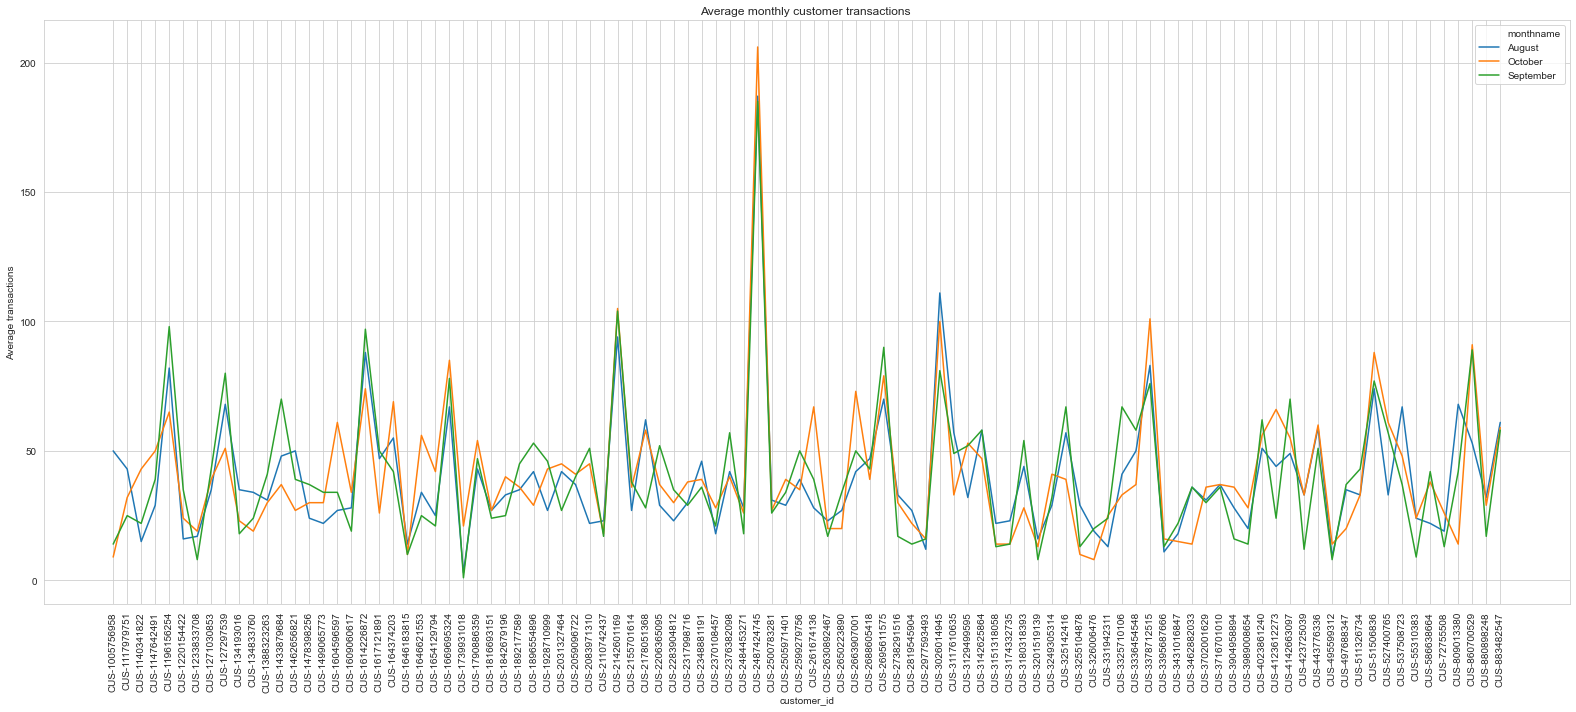

In [17]:
plt.figure(figsize=(22,10))
sns.set_style("whitegrid")
sns.lineplot(x='customer_id',y='transaction_id',hue='monthname',estimator=np.mean,data=anz_dataset1)
plt.ylabel('Average transactions')
plt.title('Average monthly customer transactions ')
plt.xticks(rotation=90)
plt.tight_layout()
# plt.grid(False)

In [18]:
anz_dataset2=pd.DataFrame(anz_transaction_dataset.groupby(by=['date','monthname']).transaction_id.count()).reset_index()

In [19]:
anz_dataset2.head(5)

,date,monthname,transaction_id
0,2018-08-01,August,137
1,2018-08-02,August,152
2,2018-08-03,August,157
3,2018-08-04,August,118
4,2018-08-05,August,100


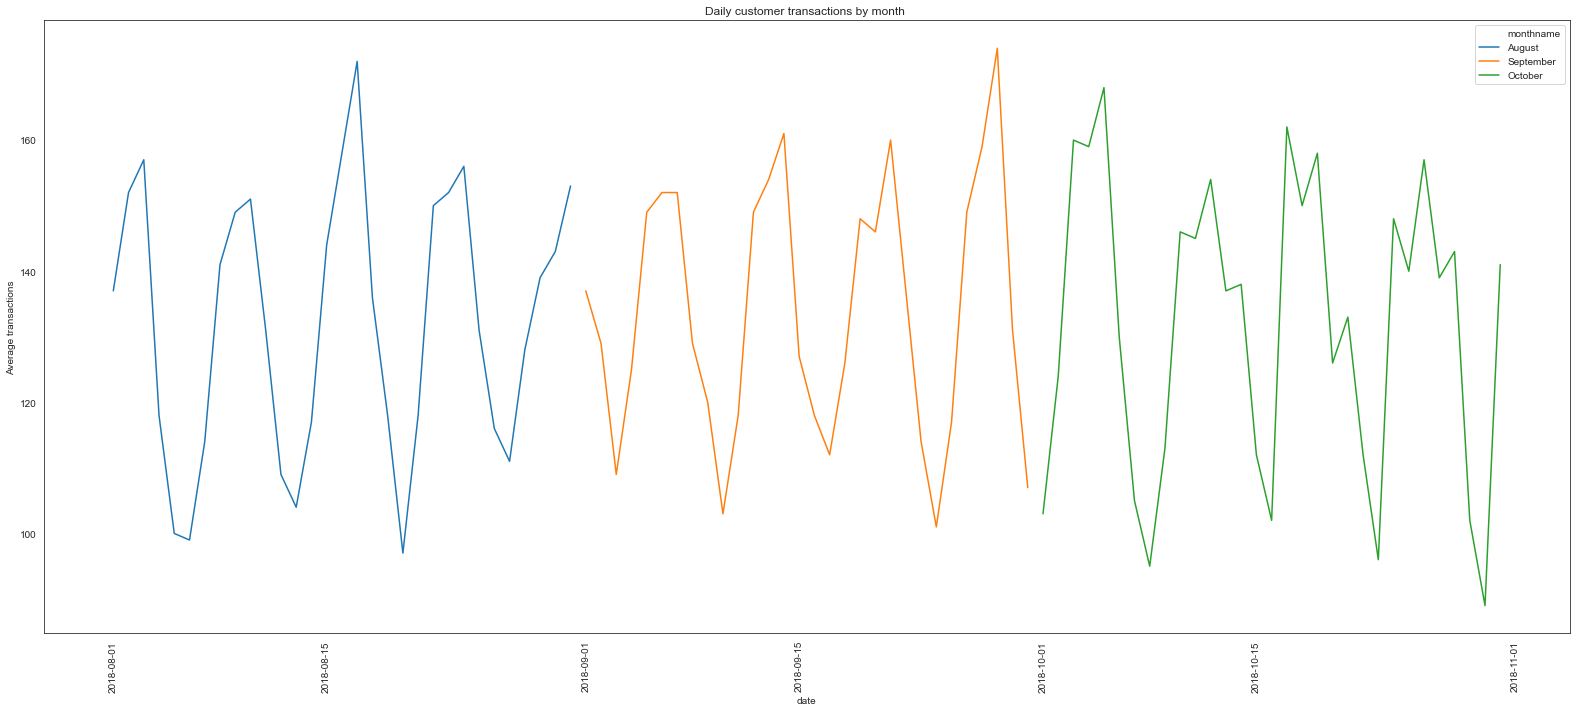

In [20]:
plt.figure(figsize=(22,10))
sns.set_style("white")
sns.lineplot(x='date',y='transaction_id',hue='monthname',data=anz_dataset2)
plt.ylabel('Average transactions')
plt.title('Daily customer transactions by month ')
plt.xticks(rotation=90)
plt.tight_layout()

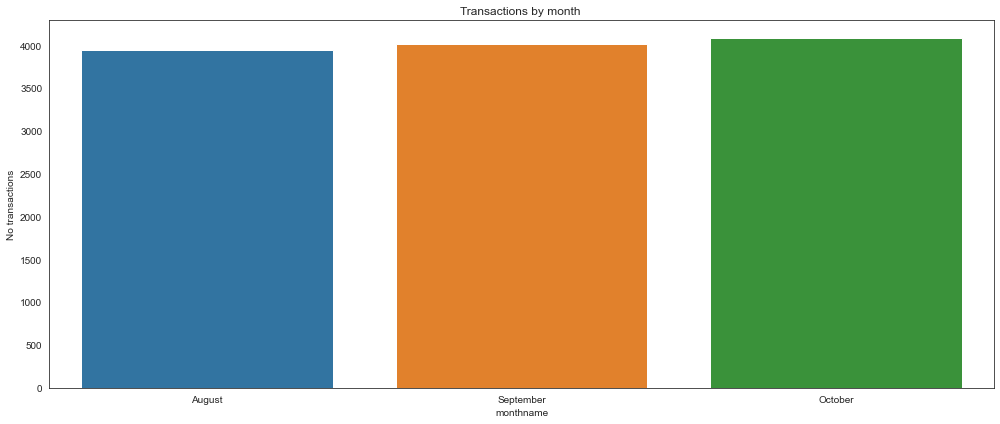

In [21]:
plt.figure(figsize=(14,6))
sns.set_style("white")
sns.countplot(x='monthname',data=anz_transaction_dataset)
plt.ylabel('No transactions')
plt.title('Transactions by month ')
plt.tight_layout()

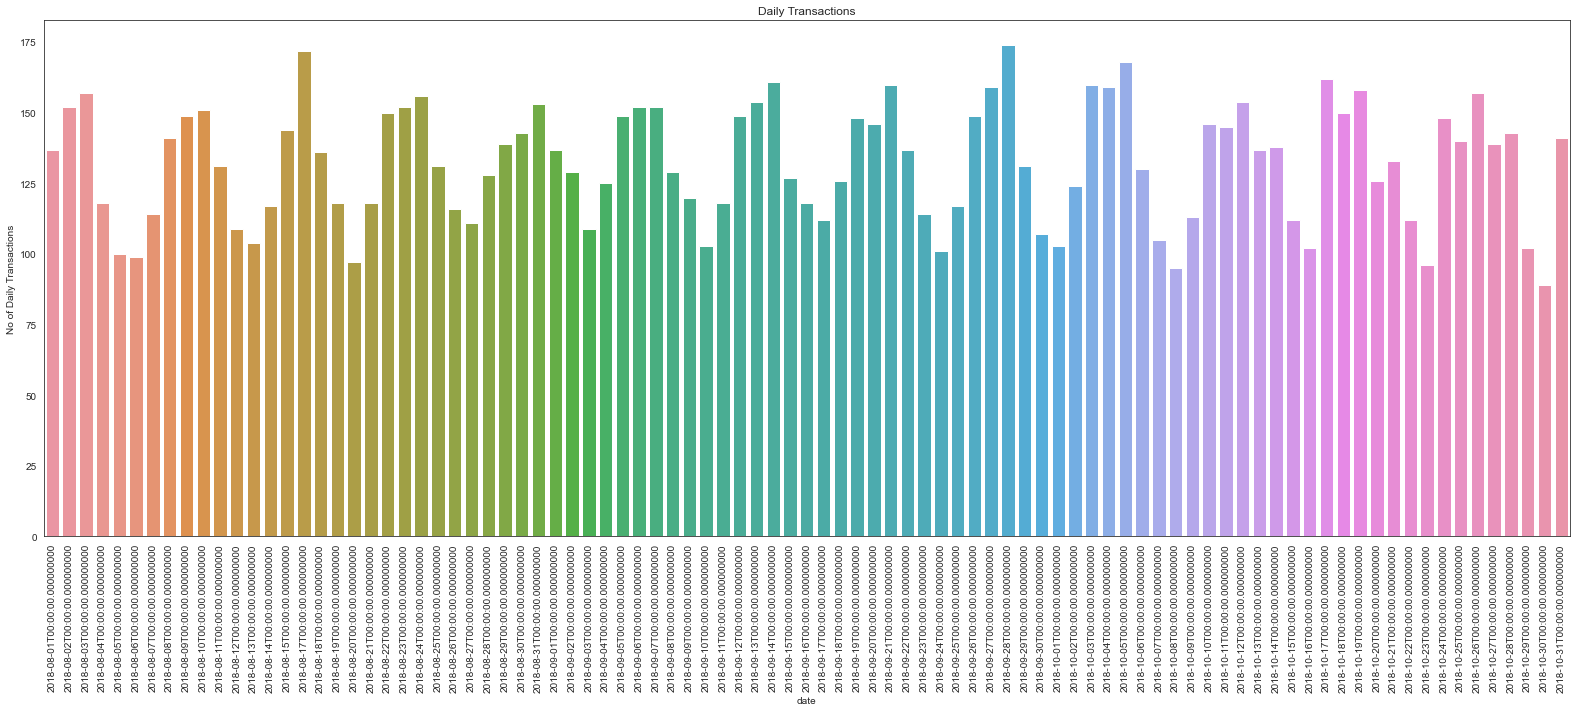

In [22]:
plt.figure(figsize=(22,10))
sns.set_style("white")
sns.countplot(x='date',data=anz_transaction_dataset)
plt.ylabel('No of Daily Transactions')
plt.title('Daily Transactions')
plt.xticks(rotation=90)
plt.tight_layout()

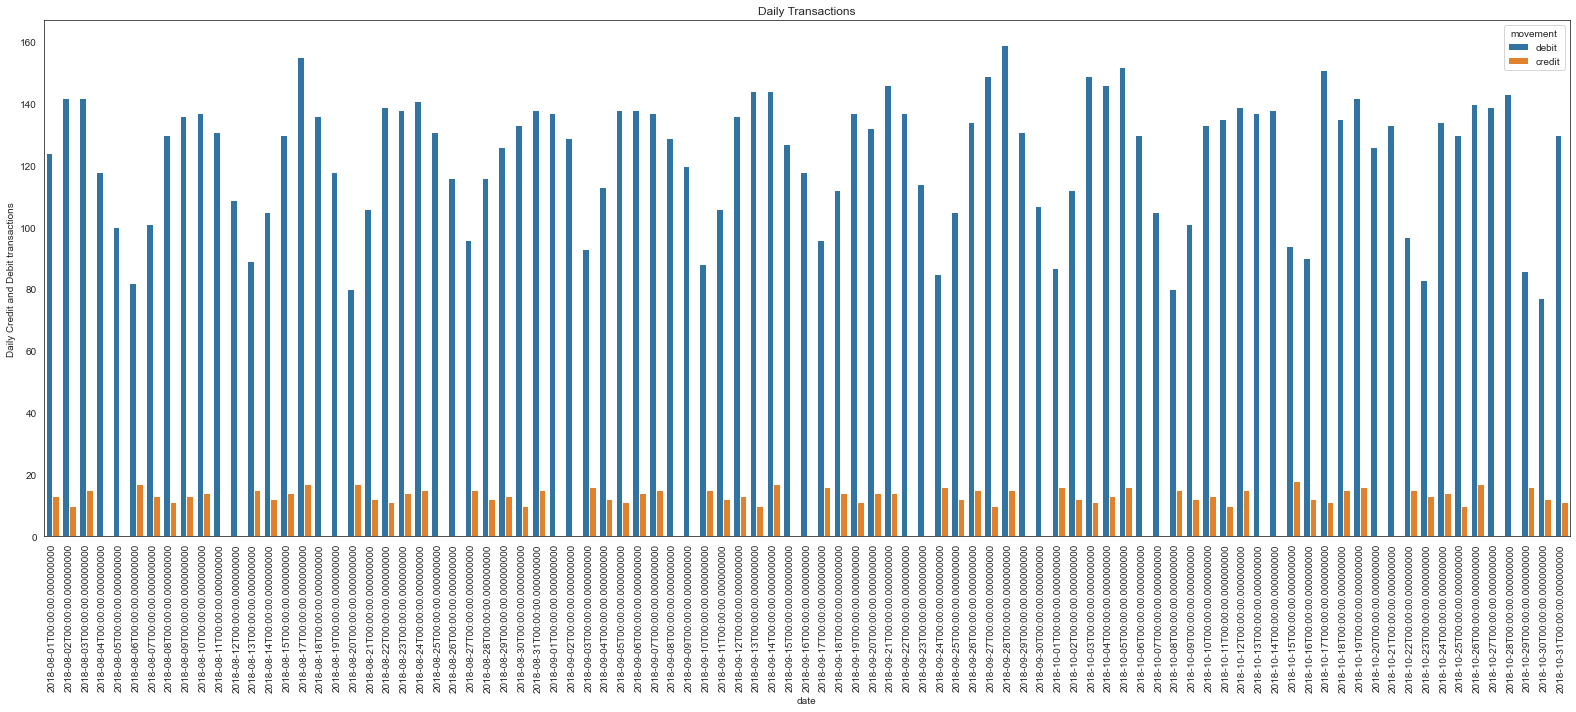

In [23]:
plt.figure(figsize=(22,10))
sns.set_style("white")
sns.countplot(x='date',hue='movement',data=anz_transaction_dataset)
plt.ylabel('Daily Credit and Debit transactions')
plt.title('Daily Transactions')
plt.xticks(rotation=90)
plt.tight_layout()

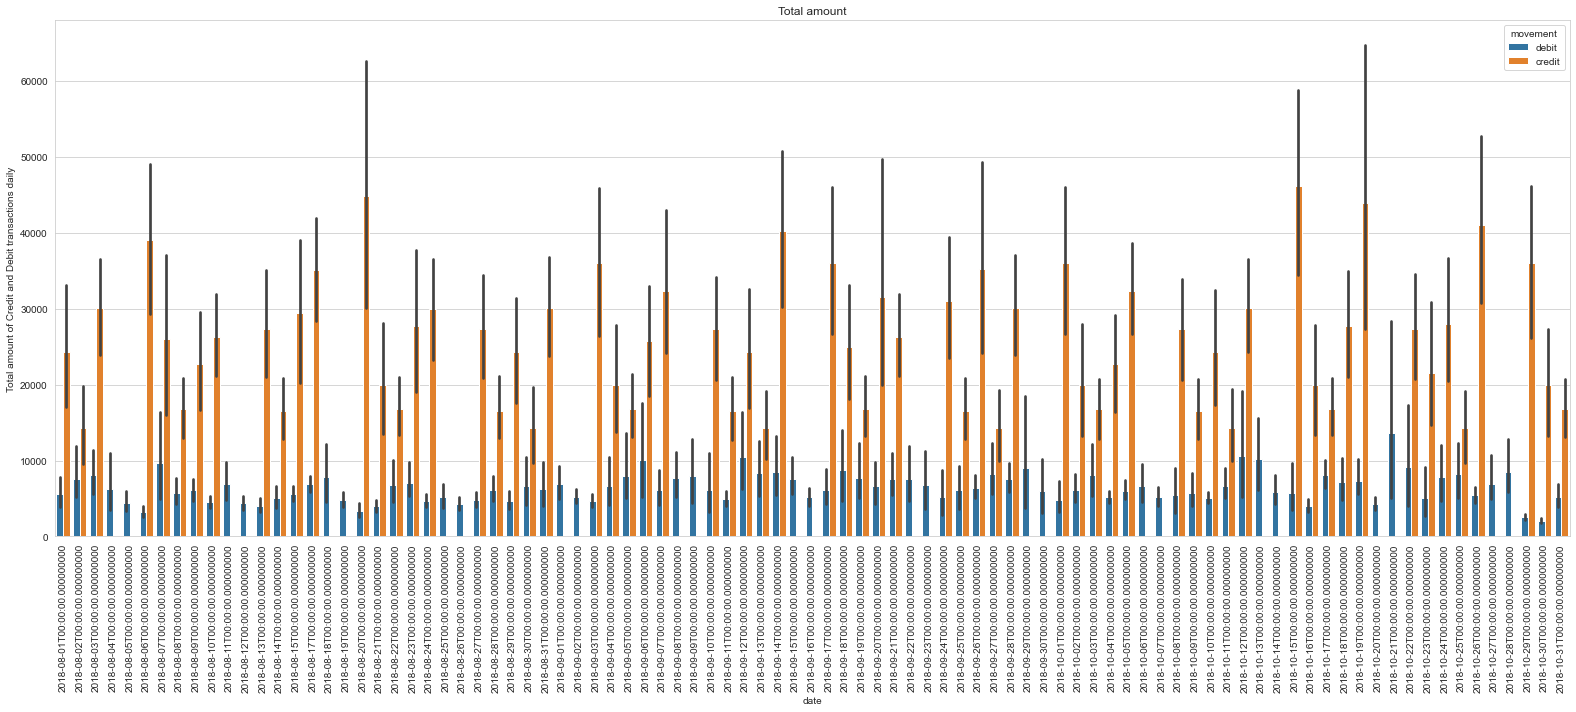

In [24]:
plt.figure(figsize=(22,10))
sns.set_style("whitegrid")
sns.barplot(x='date',y='amount',hue='movement',estimator=np.sum,data=anz_transaction_dataset)
plt.ylabel('Total amount of Credit and Debit transactions daily')
plt.title('Total amount')
plt.xticks(rotation=90)
plt.tight_layout()

## Predictive Analysis Using Linear Regression on ANZ Transactional Dataset

In [27]:
anz = anz_transaction_dataset.copy()

In [28]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,country,customer_id,merchant_long_lat,movement,time,weekday,month,week,monthname,weekdayname
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,2,8,31,August,Wednesday
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,2,8,31,August,Wednesday
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,2,8,31,August,Wednesday
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,2,8,31,August,Wednesday
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,2,8,31,August,Wednesday


In [35]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null datetime64[ns, UTC]
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id    

In [29]:
anz['date']=pd.to_datetime(anz['date'],infer_datetime_format=True, errors='coerce')
anz['extraction']=pd.to_datetime(anz['extraction'],infer_datetime_format=True, errors='coerce')

In [39]:
anz['time']=anz['extraction'].dt.time
anz['weekday']=anz['date'].dt.weekday
anz['month']=anz['date'].dt.month
anz['week']=anz['date'].dt.week
anz['monthname']=anz['date'].dt.month_name()
anz['weekdayname']=anz['date'].dt.day_name()
anz['year']=anz['date'].dt.year

In [40]:
anz["txn_description"].value_counts(dropna=False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [42]:
anz["first_name"].nunique()

80

In [52]:
train=anz[anz['txn_description']=='PAY/SALARY'].sort_values(by='first_name') 
#selecting rows with salary payment
train

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,customer_id,merchant_long_lat,movement,time,weekday,month,week,monthname,weekdayname,year
1994,posted,NaN,0,ACC-2528867619,AUD,138.58 -34.96,PAY/SALARY,NaN,0.0,Abigail,...,CUS-2505971401,NaN,credit,13:00:00,4,8,33,August,Friday,2018
11345,posted,NaN,0,ACC-2528867619,AUD,138.58 -34.96,PAY/SALARY,NaN,0.0,Abigail,...,CUS-2505971401,NaN,credit,13:00:00,4,10,43,October,Friday,2018
2929,posted,NaN,0,ACC-2528867619,AUD,138.58 -34.96,PAY/SALARY,NaN,0.0,Abigail,...,CUS-2505971401,NaN,credit,13:00:00,4,8,34,August,Friday,2018
7617,posted,NaN,0,ACC-2528867619,AUD,138.58 -34.96,PAY/SALARY,NaN,0.0,Abigail,...,CUS-2505971401,NaN,credit,13:00:00,4,9,39,September,Friday,2018
4806,posted,NaN,0,ACC-2528867619,AUD,138.58 -34.96,PAY/SALARY,NaN,0.0,Abigail,...,CUS-2505971401,NaN,credit,13:00:00,4,9,36,September,Friday,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,posted,NaN,0,ACC-3689607373,AUD,115.79 -31.79,PAY/SALARY,NaN,0.0,Virginia,...,CUS-127297539,NaN,credit,12:00:00,4,8,35,August,Friday,2018
4798,posted,NaN,0,ACC-3689607373,AUD,115.79 -31.79,PAY/SALARY,NaN,0.0,Virginia,...,CUS-127297539,NaN,credit,12:00:00,4,9,36,September,Friday,2018
6664,posted,NaN,0,ACC-3689607373,AUD,115.79 -31.79,PAY/SALARY,NaN,0.0,Virginia,...,CUS-127297539,NaN,credit,12:00:00,4,9,38,September,Friday,2018
11335,posted,NaN,0,ACC-3689607373,AUD,115.79 -31.79,PAY/SALARY,NaN,0.0,Virginia,...,CUS-127297539,NaN,credit,12:00:00,4,10,43,October,Friday,2018


In [50]:
train2=anz[anz['txn_description']!='PAY/SALARY'].sort_values(by='first_name')
#selecting rows without salary payment i.e debit transactions
train2

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,customer_id,merchant_long_lat,movement,time,weekday,month,week,monthname,weekdayname,year
11566,authorized,1.0,NaN,ACC-2528867619,AUD,138.58 -34.96,SALES-POS,79169d98-7fa1-4569-9c37-fc17037801f4,NaN,Abigail,...,CUS-2505971401,149.13 -35.32,debit,23:36:36,5,10,43,October,Saturday,2018
6915,authorized,1.0,NaN,ACC-2528867619,AUD,138.58 -34.96,SALES-POS,ea247b5c-61ee-4106-988f-84c3036ce5e0,NaN,Abigail,...,CUS-2505971401,150.6 -34.92,debit,04:34:09,6,9,38,September,Sunday,2018
4641,authorized,1.0,NaN,ACC-2528867619,AUD,138.58 -34.96,POS,a1506bc9-8acb-449d-840f-de8c2566d81f,NaN,Abigail,...,CUS-2505971401,138.6 -34.92,debit,10:22:04,3,9,36,September,Thursday,2018
6788,posted,NaN,NaN,ACC-2528867619,AUD,138.58 -34.96,PAYMENT,NaN,NaN,Abigail,...,CUS-2505971401,NaN,debit,08:00:00,5,9,38,September,Saturday,2018
11510,authorized,1.0,NaN,ACC-2528867619,AUD,138.58 -34.96,SALES-POS,86f838e5-2161-4e93-b259-43f5ff0db914,NaN,Abigail,...,CUS-2505971401,150.61 -34.89,debit,16:54:34,5,10,43,October,Saturday,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,authorized,1.0,NaN,ACC-3689607373,AUD,115.79 -31.79,SALES-POS,15f95e2b-b264-42da-843b-bde7a0d9c62a,NaN,Virginia,...,CUS-127297539,138.69 -34.83,debit,19:00:17,6,9,35,September,Sunday,2018
10669,authorized,1.0,NaN,ACC-3689607373,AUD,115.79 -31.79,POS,cb61bd65-20c3-48ab-a92b-2589637547c0,NaN,Virginia,...,CUS-127297539,115.93 -31.97,debit,08:57:03,6,10,42,October,Sunday,2018
4087,authorized,1.0,NaN,ACC-3689607373,AUD,115.79 -31.79,POS,7acb0082-2056-4040-8c99-ad7fba5662f3,NaN,Virginia,...,CUS-127297539,115.76 -32.37,debit,03:09:59,6,9,35,September,Sunday,2018
2174,authorized,1.0,NaN,ACC-3689607373,AUD,115.79 -31.79,SALES-POS,1e91bba1-0d71-4f5b-9fa0-a42a994810d5,NaN,Virginia,...,CUS-127297539,115.93 -31.96,debit,15:35:18,5,8,33,August,Saturday,2018


In [45]:
anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'time', 'weekday', 'month', 'week', 'monthname',
       'weekdayname', 'year'],
      dtype='object')

In [46]:
train3=train[['date','year','month','first_name','txn_description','amount','balance','gender', 'age','country','movement']].copy()
train3

,date,year,month,first_name,txn_description,amount,balance,gender,age,country,movement
1994,2018-08-17,2018,8,Abigail,PAY/SALARY,1946.57,5075.31,F,40,Australia,credit
11345,2018-10-26,2018,10,Abigail,PAY/SALARY,1946.57,21213.46,F,40,Australia,credit
2929,2018-08-24,2018,8,Abigail,PAY/SALARY,1946.57,6711.74,F,40,Australia,credit
7617,2018-09-28,2018,9,Abigail,PAY/SALARY,1946.57,14874.05,F,40,Australia,credit
4806,2018-09-07,2018,9,Abigail,PAY/SALARY,1946.57,10201.90,F,40,Australia,credit
...,...,...,...,...,...,...,...,...,...,...,...
3842,2018-08-31,2018,8,Virginia,PAY/SALARY,1138.79,4999.83,F,20,Australia,credit
4798,2018-09-07,2018,9,Virginia,PAY/SALARY,1138.79,5127.85,F,20,Australia,credit
6664,2018-09-21,2018,9,Virginia,PAY/SALARY,1138.79,6614.30,F,20,Australia,credit
11335,2018-10-26,2018,10,Virginia,PAY/SALARY,1138.79,9068.07,F,20,Australia,credit


In [47]:
train4=train2[['date','year','month','first_name','txn_description','amount','balance','gender', 'age','country','movement']].copy()
train4

,date,year,month,first_name,txn_description,amount,balance,gender,age,country,movement
11566,2018-10-27,2018,10,Abigail,SALES-POS,33.47,21008.39,F,40,Australia,debit
6915,2018-09-23,2018,9,Abigail,SALES-POS,45.92,12971.58,F,40,Australia,debit
4641,2018-09-06,2018,9,Abigail,POS,91.94,8275.78,F,40,Australia,debit
6788,2018-09-22,2018,9,Abigail,PAYMENT,82.00,13032.20,F,40,Australia,debit
11510,2018-10-27,2018,10,Abigail,SALES-POS,33.73,21134.17,F,40,Australia,debit
...,...,...,...,...,...,...,...,...,...,...,...
4171,2018-09-02,2018,9,Virginia,SALES-POS,11.29,4301.09,F,20,Australia,debit
10669,2018-10-21,2018,10,Virginia,POS,14.66,8047.11,F,20,Australia,debit
4087,2018-09-02,2018,9,Virginia,POS,16.51,4393.98,F,20,Australia,debit
2174,2018-08-18,2018,8,Virginia,SALES-POS,69.31,3645.75,F,20,Australia,debit


## Estimating the amount spent by each `first_name` in the dataset payment by *salary* and *debit*

for August

In [67]:
augsal=pd.DataFrame(train3[train3['month']==8].groupby('first_name').amount.sum()).reset_index()
augdeb=pd.DataFrame(train4[train4['month']==8].groupby('first_name').amount.sum()).reset_index()
#train3 = salary transactions
#train4 = debit transactions

In [72]:
augdeb

,first_name,amount
0,Abigail,1179.39
1,Alexander,1611.48
2,Amy,2057.64
3,Andrew,558.21
4,Antonio,2356.59
...,...,...
75,Tim,1614.75
76,Timothy,685.87
77,Tonya,3411.72
78,Tyler,2462.20


In [71]:
augsal

,first_name,amount
0,Abigail,9732.85
1,Alexander,7299.02
2,Amy,3260.72
3,Andrew,3129.68
4,Antonio,5494.55
...,...,...
74,Tim,8835.98
75,Timothy,3281.66
76,Tonya,8520.45
77,Tyler,10990.28


for September

In [68]:
septsal=pd.DataFrame(train3[train3['month']==9].groupby('first_name').amount.sum()).reset_index()
septdeb=pd.DataFrame(train4[train4['month']==9].groupby('first_name').amount.sum()).reset_index()
#train3 = salary transactions
#train4 = debit transactions

In [74]:
septsal

,first_name,amount
0,Abigail,7786.28
1,Alexander,7299.02
2,Amy,3260.72
3,Andrew,3129.68
4,Antonio,4395.64
...,...,...
74,Tim,8835.98
75,Timothy,3281.66
76,Tonya,5680.30
77,Tyler,9947.16


In [73]:
septdeb

,first_name,amount
0,Abigail,1536.66
1,Alexander,2537.45
2,Amy,1625.79
3,Andrew,449.00
4,Antonio,924.42
...,...,...
75,Tim,1508.71
76,Timothy,1433.95
77,Tonya,2934.96
78,Tyler,4917.83


for October

In [69]:
octsal=pd.DataFrame(train3[train3['month']==10].groupby('first_name').amount.sum()).reset_index()
octdeb=pd.DataFrame(train4[train4['month']==10].groupby('first_name').amount.sum()).reset_index()
#train3 = salary transactions
#train4 = debit transactions

In [76]:
octsal

,first_name,amount
0,Abigail,7786.28
1,Alexander,7299.02
2,Amy,3260.72
3,Andrew,3129.68
4,Antonio,5494.55
...,...,...
75,Tim,17671.96
76,Timothy,3281.66
77,Tonya,5680.30
78,Tyler,10990.28


In [75]:
octdeb

,first_name,amount
0,Abigail,1690.46
1,Alexander,1652.19
2,Amy,1297.55
3,Andrew,449.00
4,Antonio,3475.76
...,...,...
75,Tim,1748.16
76,Timothy,665.80
77,Tonya,2846.61
78,Tyler,2595.38


In [70]:
lis=[]
lis2=[]
lis3=[]
for a,b,c in zip(train3['first_name'],train3['age'],train3['gender']):
    for i in augsal['first_name']:
        if i in lis2:
            #if augsal["first_name"] already exists in lis2
            pass #do nothing
        else:
            if i==a:
                #if the value from augsal['first_name'] is the same as train3['first_name']
                lis.append(b)
                lis2.append(a)
                lis3.append(c)

#train3 = salary transactions
#lis contains age
#lis2 contains first_name
#lis3 contains gender

In [87]:
print(lis)
print("\n")
print(lis2)
print("\n")
print(lis3)

[40, 38, 43, 78, 26, 25, 38, 52, 42, 26, 18, 39, 33, 19, 28, 22, 20, 42, 18, 20, 26, 22, 28, 19, 50, 43, 22, 19, 42, 41, 23, 30, 28, 30, 21, 38, 37, 21, 26, 35, 24, 43, 35, 18, 21, 27, 18, 35, 23, 64, 39, 30, 21, 30, 19, 40, 31, 46, 25, 21, 38, 40, 37, 43, 20, 34, 47, 31, 34, 46, 23, 53, 20, 25, 40, 20, 27, 69, 20]


['Abigail', 'Alexander', 'Amy', 'Andrew', 'Antonio', 'Ashley', 'Barry', 'Billy', 'Brian', 'Catherine', 'Charles', 'Christine', 'Christopher', 'Cindy', 'Craig', 'Daniel', 'Darren', 'David', 'Debra', 'Derek', 'Diana', 'Donald', 'Dustin', 'Edward', 'Elizabeth', 'Emily', 'Eric', 'Fernando', 'Gregory', 'Heather', 'Isaiah', 'Jacqueline', 'James', 'Jeffrey', 'Jessica', 'Jonathan', 'Joseph', 'Kaitlyn', 'Karen', 'Kenneth', 'Kimberly', 'Kristin', 'Linda', 'Lori', 'Lucas', 'Luis', 'Mackenzie', 'Maria', 'Marissa', 'Mary', 'Matthew', 'Melissa', 'Michael', 'Michele', 'Michelle', 'Natasha', 'Nathaniel', 'Patrick', 'Paul', 'Rachael', 'Renee', 'Rhonda', 'Richard', 'Ricky', 'Robert', 'Robin

In [92]:
is1=[]
is2=[]

for a,b in zip(augdeb['first_name'],augdeb['amount']):
    for i in augsalary['first_name']:
        if i in is2:
            pass
        else:
            if i==a:
                is1.append(b)
                is2.append(a)
                
#is1 contains amount from debit transactions for the month of August for customers listed in both augsal and augdeb
#is2 contains first_name of customers that were listed in the Salary payment transactions as well
print(len(is1))
print(augsal["first_name"].nunique())
print(augdeb["first_name"].nunique())

79
79
80


In [93]:
augsal['age']=lis
augsal['gender']=lis3
augsal['debittrans']=is1

In [94]:
augsal

,first_name,amount,age,gender,debittrans
0,Abigail,9732.85,40,F,1179.39
1,Alexander,7299.02,38,M,1611.48
2,Amy,3260.72,43,F,2057.64
3,Andrew,3129.68,78,M,558.21
4,Antonio,5494.55,26,M,2356.59
...,...,...,...,...,...
74,Tim,8835.98,40,M,1614.75
75,Timothy,3281.66,20,M,685.87
76,Tonya,8520.45,27,F,3411.72
77,Tyler,10990.28,69,M,2462.20


In [95]:
slis=[]
slis2=[]
slis3=[]
for a,b,c in zip(train3['first_name'],train3['age'],train3['gender']):
    for i in septsal['first_name']:
        if i in slis2:
            pass
        else:
            if i==a:
                #if septsal['first_name'] is the same as train3['first_name']
                slis.append(b)
                slis2.append(a)
                slis3.append(c)
                
#train3 contains data from salary transactions
#slis contains contains age of customers
#slis2 contains first_name of customers
#slis3 contains gender of customers

In [96]:
sis1=[]
sis2=[]
for a,b in zip(septdeb['first_name'],septdeb['amount']):
    for i in septsal['first_name']:
        if i in sis2:
            pass
        else:
            if i==a:
                #if septsal['first_name'] is the same as sepdeb['first_name'], accounting for the same name in both debit
                #and salary payment methods
                sis1.append(b)
                sis2.append(a)


#sis1 contains amount spent in the month of september through debit payment method
#sis2 contains first_name of customer

In [100]:
septsal['age']=slis
septsal['gender']=slis3
septsal['debittrans']=sis1

In [101]:
septsal

,first_name,amount,age,gender,debittrans
0,Abigail,7786.28,40,F,1536.66
1,Alexander,7299.02,38,M,2537.45
2,Amy,3260.72,43,F,1625.79
3,Andrew,3129.68,78,M,449.00
4,Antonio,4395.64,26,M,924.42
...,...,...,...,...,...
74,Tim,8835.98,40,M,1508.71
75,Timothy,3281.66,20,M,1433.95
76,Tonya,5680.30,27,F,2934.96
77,Tyler,9947.16,69,M,4917.83


In [113]:
oslis=[]
oslis2=[]
oslis3=[]
for a,b,c in zip(train3['first_name'],train3['age'],train3['gender']):
    for i in octsal['first_name']:
        if i in oslis2:
            pass
        else:
            if i==a:
                #if octsal['first_name'] is the same as train3['first_name']
                oslis.append(b)
                oslis2.append(a)
                oslis3.append(c)
                
#train3 contains payments through salary transactions                
#oslis contains age of customers
#oslis2 contains first_name of customers
#oslis3 contains gender of customers

In [116]:
osis1=[]
osis2=[]
for a,b in zip(octdeb['first_name'],octdeb['amount']):
    for i in octsal['first_name']:
        if i in osis2:
            pass
        else:
            if i==a:
                #if octsalary['first_name'] is the same as octdebit['first_name'], accounting for names that occur in both
                #salary and debit payment methods
                osis1.append(b)
                osis2.append(a)
                
                
#osis1 contains amount spent in the month of october by first_name(customer)
#osis2 contains first_name of customer

In [117]:
octsal['age']=oslis
octsal['gender']=oslis3
octsal['debittrans']=osis1

In [118]:
octsal

,first_name,amount,age,gender,debittrans
0,Abigail,7786.28,40,F,1690.46
1,Alexander,7299.02,38,M,1652.19
2,Amy,3260.72,43,F,1297.55
3,Andrew,3129.68,78,M,449.00
4,Antonio,5494.55,26,M,3475.76
...,...,...,...,...,...
75,Tim,17671.96,40,M,1748.16
76,Timothy,3281.66,20,M,665.80
77,Tonya,5680.30,27,F,2846.61
78,Tyler,10990.28,69,M,2595.38


In [122]:
monthsal =septsal.append(octsal).append(augsal)
# appending the data for the 3 months (stacking them vertically)

In [125]:
monthsal['gender']=monthsal['gender'].replace({'F':0,'M':1})
#converting the gender column into binary values

In [126]:
monthsal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 78
Data columns (total 5 columns):
first_name    238 non-null object
amount        238 non-null float64
age           238 non-null int64
gender        238 non-null int64
debittrans    238 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 11.2+ KB


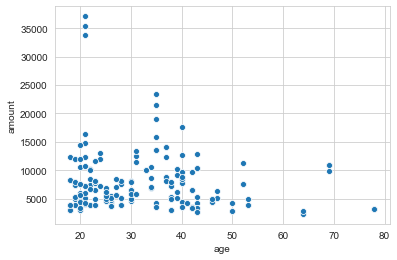

In [130]:
sns.scatterplot(x='age',y='amount',data=monthsal)

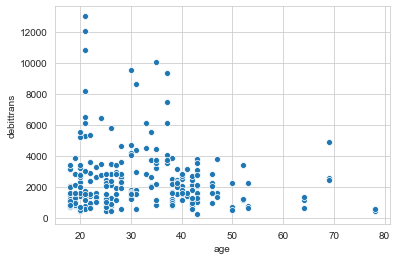

In [131]:
sns.scatterplot(x='age',y='debittrans',data=monthsal)

From the above scatterplots, it is seen that most earners are rom the range age 20 - 45 and most debtxn are from the range age 20 - 45

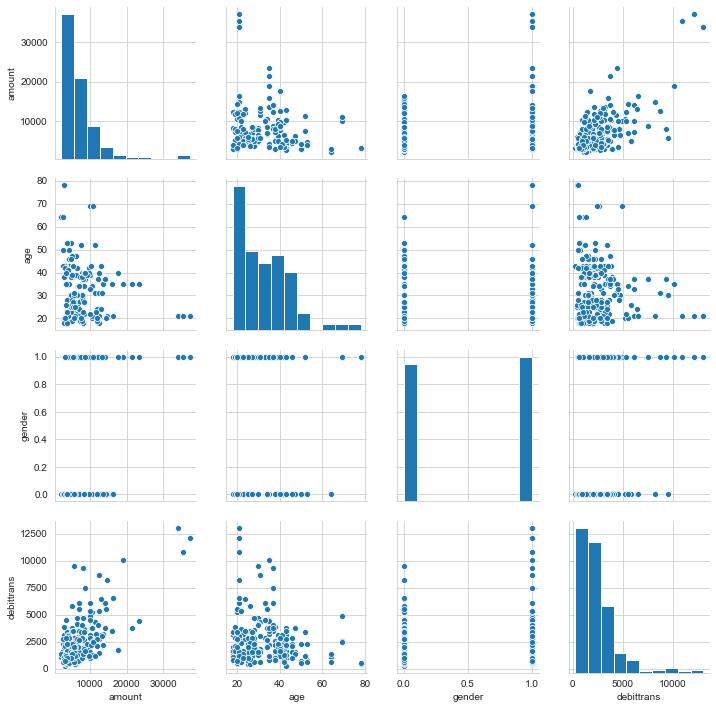

In [132]:
sns.pairplot(monthsal)

In [133]:
monthsal.corr()

,amount,age,gender,debittrans
amount,1.000000,-0.101390,0.201116,0.679160
age,-0.101390,1.000000,0.003465,-0.103173
gender,0.201116,0.003465,1.000000,0.082971
debittrans,0.679160,-0.103173,0.082971,1.000000


In [135]:
X = monthsal.drop(['amount','first_name'], axis=1)
y = monthsal.amount

In [136]:
X

,age,gender,debittrans
0,40,0,1536.66
1,38,1,2537.45
2,43,0,1625.79
3,78,1,449.00
4,26,1,924.42
...,...,...,...
74,40,1,1614.75
75,20,1,685.87
76,27,0,3411.72
77,69,1,2462.20


In [137]:
y

0      7786.28
1      7299.02
2      3260.72
3      3129.68
4      4395.64
        ...   
74     8835.98
75     3281.66
76     8520.45
77    10990.28
78     5693.95
Name: amount, Length: 238, dtype: float64

In [138]:
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [141]:
## standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)

In [142]:
X = pd.DataFrame(X_new, columns = X.columns)
X.head()

,age,gender,debittrans
0,0.644927,-1.025536,-0.454191
1,0.480324,0.975100,0.045469
2,0.891832,-1.025536,-0.409691
3,3.772390,0.975100,-0.997221
4,-0.507296,0.975100,-0.759861


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.192, random_state = 1)

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6823349983959767

From the Linear Regression model score, my assumption is that the Model is 68.2% accurate which I feel is questionable.

## Using Decision Tree Regressor

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.4723641554738738

From the Decision Tree Rgression model score, my assumption is that the Model is 47.2% accurate, and I feel it is not a good model.